# M4 chatGPT - 20 Features

In [24]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

In [3]:
import pandas as pd
import numpy as np

def get_dataset(filepath):
    df = pd.read_csv(filepath)
    #print(df.head())
    X_list = []
    y_list = []
    human = ['no_sentence_human', 'num_words_human', 'character0_human', 'character1_human', 'character2_3_human', 'character4_human', 'character5_human', 'std_dev_human', 'sent_len_diff_human', 'count_short_sentences_in_paragraphs_human', 'count_long_sentences_in_paragraphs_human', 'check_word0_human', 'check_word1_human', 'check_word2_3_human', 'check_word3_human', 'check_word4_human', 'check_word5_human', 'check_num_human', 'check_capitals_human', 'check_et_human']
    machine = ['no_sentence_machine', 'num_words_machine', 'character0_machine', 'character1_machine', 'character2_3_machine', 'character4_machine', 'character5_machine', 'std_dev_machine', 'sent_len_diff_machine', 'count_short_sentences_in_paragraphs_machine', 'count_long_sentences_in_paragraphs_machine', 'check_word0_machine', 'check_word1_machine', 'check_word2_3_machine', 'check_word3_machine', 'check_word4_machine', 'check_word5_machine', 'check_num_machine', 'check_capitals_machine', 'check_et_machine']

    df_human = df.loc[:, human]
    df_human['class'] = 0
    df_machine = df.loc[:, machine]
    df_machine['class'] = 1

    human = {'no_sentence_human': 'no_sentence', 'num_words_human': 'num_words', 'character0_human': 'character0', 'character1_human': 'character1', 'character2_3_human': 'character2_3', 'character4_human': 'character4', 'character5_human': 'character5', 'std_dev_human': 'std_dev', 'sent_len_diff_human': 'sent_len_diff', 'count_short_sentences_in_paragraphs_human': 'count_short_sentences_in_paragraphs', 'count_long_sentences_in_paragraphs_human': 'count_long_sentences_in_paragraphs', 'check_word0_human': 'check_word0', 'check_word1_human': 'check_word1', 'check_word2_3_human': 'check_word2_3', 'check_word3_human': 'check_word3', 'check_word4_human': 'check_word4', 'check_word5_human': 'check_word5', 'check_num_human': 'check_num', 'check_capitals_human': 'check_capitals', 'check_et_human': 'check_et'}
    machine = {'no_sentence_machine': 'no_sentence', 'num_words_machine': 'num_words', 'character0_machine': 'character0', 'character1_machine': 'character1', 'character2_3_machine': 'character2_3', 'character4_machine': 'character4', 'character5_machine': 'character5', 'std_dev_machine': 'std_dev', 'sent_len_diff_machine': 'sent_len_diff', 'count_short_sentences_in_paragraphs_machine': 'count_short_sentences_in_paragraphs', 'count_long_sentences_in_paragraphs_machine': 'count_long_sentences_in_paragraphs', 'check_word0_machine': 'check_word0', 'check_word1_machine': 'check_word1', 'check_word2_3_machine': 'check_word2_3', 'check_word3_machine': 'check_word3', 'check_word4_machine': 'check_word4', 'check_word5_machine': 'check_word5', 'check_num_machine': 'check_num', 'check_capitals_machine': 'check_capitals', 'check_et_machine': 'check_et'}

    df_human = df_human.rename(columns=human)
    df_machine = df_machine.rename(columns=machine)

    full_df = pd.concat([df_human, df_machine], ignore_index=True)
    
    for i in range(len(full_df.columns)-2):
        for j in range(i,(len(full_df.columns)-2)):
            X = full_df.iloc[:,[i,j+1]]
            #print(X.head())
            y = full_df.iloc[:,-1]
            X_list.append(X)
            y_list.append(y)

    return X_list, y_list

# XGBoost classifier trained and tested on M4 chatGPT

In [4]:
def xgboost_train(X_train, y_train, X_val, y_val, X_test, y_test):
    plt.figure(figsize=(10, 6))
    lr = 0.01
    weight = 4.5
    evalset = [(X_train, y_train), (X_val,y_val)]
    xgb_classifier = XGBClassifier(n_estimators=500,
                                use_label_encoder=False,
                                eval_metric="logloss",
                                early_stopping_rounds=5,
                                n_jobs=-1,
                                eta=lr,
                                reg_lambda=1,
                                min_child_weight=weight)
    xgb_classifier.fit(X_train, y_train,
                    eval_set=evalset,
                    verbose=False)
    results = xgb_classifier.evals_result()
    yhat = xgb_classifier.predict(X_test)
    score = accuracy_score(y_test, yhat)
    print('Accuracy: %.3f' % score)
    if score > 0.9:
        plt.plot(results['validation_0']['logloss'], label='train')
        plt.plot(results['validation_1']['logloss'], label='validation')
        values = list(X_train.columns.values)
        title = ' '.join(values)
        plt.title('Loss vs. Epoch for ' + title )
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        # show the legend
        plt.legend()
        # show the plot
        plt.show()
        performance_test(xgb_classifier, X_test, y_test)
    return xgb_classifier, score

In [6]:
def performance_test(xgb_classifier, X_test_list, y_test_list):
    y_pred_list = []
    y_pred = xgb_classifier.predict(X_test_list)
    

    # Compute confusion matrix
    cm = confusion_matrix(y_test_list, y_pred)

    # Plot confusion matrix using seaborn heatmap
    plt.figure(figsize=(8, 6))
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=['Human', 'Machine'], yticklabels=['Human', 'Machine'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    name = 'Confusion Matrix - ' + str(list(X_train[i].columns)) 
    plt.title(name)
    plt.show(block=False)

# Test on paraphrased chatGPT

In [5]:
def performance_chatgpt(xgb_classifier):
    gpt_para_path = '/Users/supriyaupadhyaya/Library/Mobile Documents/com~apple~CloudDocs/OVGU/project-generative-text-detector/generative-text-detectors/feature-extractor/features/m4/arxiv_chatGPT_paraphrased_test_feature.csv'
    X_gpt_para_list, y_gpt_para_list = get_dataset(gpt_para_path)
    for i in range(len(X_gpt_para_list)):
        y_pred = xgb_classifier[i].predict(X_gpt_para_list[i])

        # Compute confusion matrix
        cm = confusion_matrix(y_gpt_para_list[i], y_pred)

        # Plot confusion matrix using seaborn heatmap
        plt.figure(figsize=(8, 6))
        cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=['Human', 'Machine'], yticklabels=['Human', 'Machine'])
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix')
        plt.show()

# Test on M4 Bloomz

In [7]:
def performance_bloomz(xgb_classifier):
    bloomz_path = '/Users/supriyaupadhyaya/Library/Mobile Documents/com~apple~CloudDocs/OVGU/project-generative-text-detector/generative-text-detectors/feature-extractor/features/m4/arxiv_bloomz_test_feature.csv'
    X_bloomz_list, y_bloomz_list = get_dataset(bloomz_path)
    for i in range(len(X_bloomz_list)):
        y_pred = xgb_classifier[i].predict(X_bloomz_list[i])

        # Compute confusion matrix
        cm = confusion_matrix(y_bloomz_list[i], y_pred)

        # Plot confusion matrix using seaborn heatmap
        plt.figure(figsize=(8, 6))
        cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=['Human', 'Machine'], yticklabels=['Human', 'Machine'])
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix')
        plt.show()

## Test on cohere

In [8]:
def performance_cohere(xgb_classifier):
    path = '/Users/supriyaupadhyaya/Library/Mobile Documents/com~apple~CloudDocs/OVGU/project-generative-text-detector/generative-text-detectors/feature-extractor/features/m4/arxiv_cohere_test_feature.csv'
    X_cohere_list, y_cohere_list= get_dataset(path)
    for i in range(len(X_cohere_list)):
        y_pred = xgb_classifier[i].predict(X_cohere_list[i])

        # Compute confusion matrix
        cm = confusion_matrix(y_cohere_list[i], y_pred)

        # Plot confusion matrix using seaborn heatmap
        plt.figure(figsize=(8, 6))
        cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=['Human', 'Machine'], yticklabels=['Human', 'Machine'])
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix')
        plt.show()

## Test on Davinci

In [9]:
def performance_cohere(xgb_classifier):
    path = '/Users/supriyaupadhyaya/Library/Mobile Documents/com~apple~CloudDocs/OVGU/project-generative-text-detector/generative-text-detectors/feature-extractor/features/m4/arxiv_davinci_test_feature.csv'
    X_davinci_list, y_davinci_list= get_dataset(path)
    for i in range(len(X_davinci_list)):

        y_pred = xgb_classifier[i].predict(X_davinci_list[i])

        # Compute confusion matrix
        cm = confusion_matrix(y_davinci_list[i], y_pred)

        # Plot confusion matrix using seaborn heatmap
        plt.figure(figsize=(8, 6))
        cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=['Human', 'Machine'], yticklabels=['Human', 'Machine'])
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix')
        plt.show()

## Test on Flant5

In [10]:
def performance_cohere(xgb_classifier):
    path = '/Users/supriyaupadhyaya/Library/Mobile Documents/com~apple~CloudDocs/OVGU/project-generative-text-detector/generative-text-detectors/feature-extractor/features/m4/arxiv_flant5_test_feature.csv'
    X_flant_list, y_flant_list= get_dataset(path)
    for i in range(len(X_flant_list)):
        y_pred = xgb_classifier[i].predict(X_flant_list[i])

        # Compute confusion matrix
        cm = confusion_matrix(y_flant_list[i], y_pred)

        # Plot confusion matrix using seaborn heatmap
        plt.figure(figsize=(8, 6))
        cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=['Human', 'Machine'], yticklabels=['Human', 'Machine'])
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix')
        plt.show()

In [7]:
train_path = '/Users/supriyaupadhyaya/ovgu/generative-text-detectors/feature-extractor/features/m4/arxiv_chatGPT_train_withoutN_feature.csv'
X_train, y_train = get_dataset(train_path)

In [8]:
val_path = '/Users/supriyaupadhyaya/ovgu/generative-text-detectors/feature-extractor/features/m4/arxiv_chatGPT_val_withoutN_feature.csv'
X_val, y_val = get_dataset(val_path)

In [9]:
test_path = '/Users/supriyaupadhyaya/ovgu/generative-text-detectors/feature-extractor/features/m4/arxiv_chatGPT_test_withoutN_feature.csv'
X_test, y_test = get_dataset(test_path)

In [10]:
print(len(X_train[0]), len(X_test[0]), len(X_val[0]))
print(len(y_train[0]), len(y_test[0]), len(y_val[0]))

3840 1200 960
3840 1200 960


In [11]:
for i in range(len(X_train)):
    print(list(X_train[i].columns))

['no_sentence', 'num_words']
['no_sentence', 'character0']
['no_sentence', 'character1']
['no_sentence', 'character2_3']
['no_sentence', 'character4']
['no_sentence', 'character5']
['no_sentence', 'std_dev']
['no_sentence', 'sent_len_diff']
['no_sentence', 'count_short_sentences_in_paragraphs']
['no_sentence', 'count_long_sentences_in_paragraphs']
['no_sentence', 'check_word0']
['no_sentence', 'check_word1']
['no_sentence', 'check_word2_3']
['no_sentence', 'check_word3']
['no_sentence', 'check_word4']
['no_sentence', 'check_word5']
['no_sentence', 'check_num']
['no_sentence', 'check_capitals']
['no_sentence', 'check_et']
['num_words', 'character0']
['num_words', 'character1']
['num_words', 'character2_3']
['num_words', 'character4']
['num_words', 'character5']
['num_words', 'std_dev']
['num_words', 'sent_len_diff']
['num_words', 'count_short_sentences_in_paragraphs']
['num_words', 'count_long_sentences_in_paragraphs']
['num_words', 'check_word0']
['num_words', 'check_word1']
['num_word

['no_sentence', 'num_words']
Accuracy: 0.634
['no_sentence', 'character0']
Accuracy: 0.697
['no_sentence', 'character1']
Accuracy: 0.683
['no_sentence', 'character2_3']
Accuracy: 0.730
['no_sentence', 'character4']
Accuracy: 0.655
['no_sentence', 'character5']
Accuracy: 0.656
['no_sentence', 'std_dev']
Accuracy: 0.878
['no_sentence', 'sent_len_diff']
Accuracy: 0.733
['no_sentence', 'count_short_sentences_in_paragraphs']
Accuracy: 0.669
['no_sentence', 'count_long_sentences_in_paragraphs']
Accuracy: 0.704
['no_sentence', 'check_word0']
Accuracy: 0.655
['no_sentence', 'check_word1']
Accuracy: 0.655
['no_sentence', 'check_word2_3']
Accuracy: 0.655
['no_sentence', 'check_word3']
Accuracy: 0.655
['no_sentence', 'check_word4']
Accuracy: 0.655
['no_sentence', 'check_word5']
Accuracy: 0.655
['no_sentence', 'check_num']
Accuracy: 0.754
['no_sentence', 'check_capitals']
Accuracy: 0.664
['no_sentence', 'check_et']
Accuracy: 0.657
['num_words', 'character0']
Accuracy: 0.662
['num_words', 'characte

/var/folders/n2/wvbyn25n1xgcbwfkrnb9r7tm0000gn/T/ipykernel_17089/2230831433.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


Accuracy: 0.623
['num_words', 'character4']
Accuracy: 0.585
['num_words', 'character5']
Accuracy: 0.579
['num_words', 'std_dev']
Accuracy: 0.751
['num_words', 'sent_len_diff']
Accuracy: 0.668
['num_words', 'count_short_sentences_in_paragraphs']
Accuracy: 0.605
['num_words', 'count_long_sentences_in_paragraphs']
Accuracy: 0.677
['num_words', 'check_word0']
Accuracy: 0.585
['num_words', 'check_word1']
Accuracy: 0.585
['num_words', 'check_word2_3']
Accuracy: 0.585
['num_words', 'check_word3']
Accuracy: 0.585
['num_words', 'check_word4']
Accuracy: 0.585
['num_words', 'check_word5']
Accuracy: 0.585
['num_words', 'check_num']
Accuracy: 0.687
['num_words', 'check_capitals']
Accuracy: 0.573
['num_words', 'check_et']
Accuracy: 0.585
['character0', 'character1']
Accuracy: 0.699
['character0', 'character2_3']
Accuracy: 0.718
['character0', 'character4']
Accuracy: 0.699
['character0', 'character5']
Accuracy: 0.699
['character0', 'std_dev']
Accuracy: 0.816
['character0', 'sent_len_diff']
Accuracy: 

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

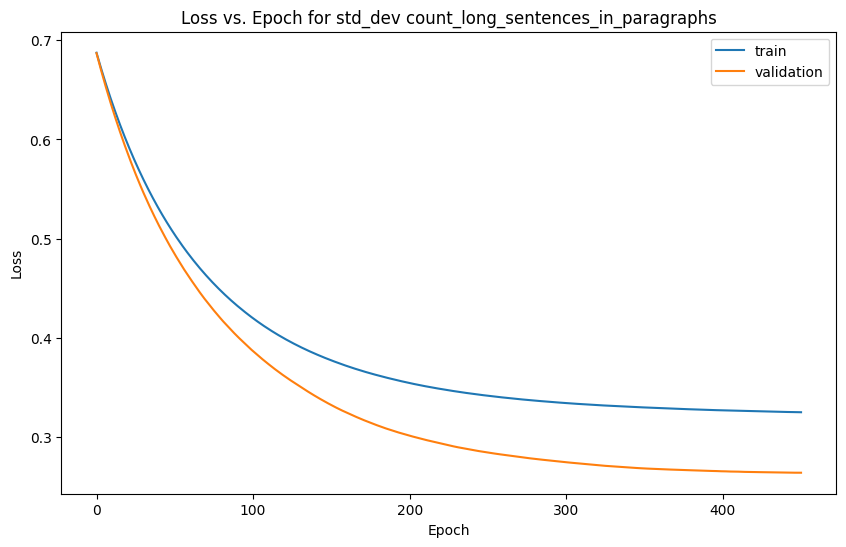

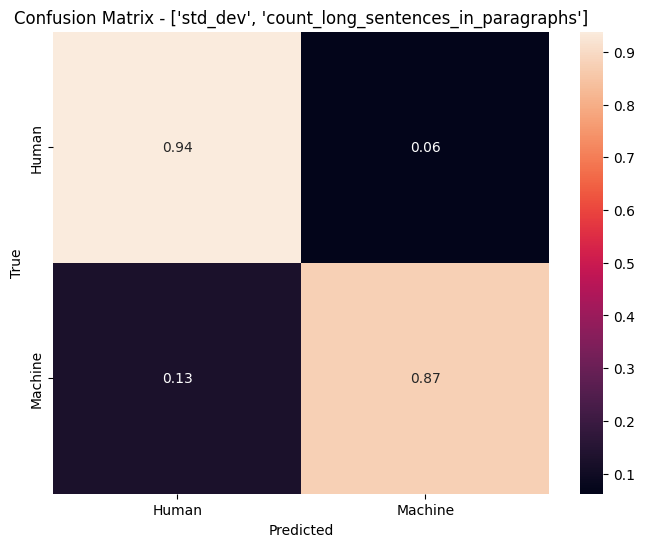

['std_dev', 'check_word0']
Accuracy: 0.818
['std_dev', 'check_word1']
Accuracy: 0.818
['std_dev', 'check_word2_3']
Accuracy: 0.818
['std_dev', 'check_word3']
Accuracy: 0.818
['std_dev', 'check_word4']
Accuracy: 0.818
['std_dev', 'check_word5']
Accuracy: 0.818
['std_dev', 'check_num']
Accuracy: 0.827
['std_dev', 'check_capitals']
Accuracy: 0.801
['std_dev', 'check_et']
Accuracy: 0.815
['sent_len_diff', 'count_short_sentences_in_paragraphs']
Accuracy: 0.750
['sent_len_diff', 'count_long_sentences_in_paragraphs']
Accuracy: 0.818
['sent_len_diff', 'check_word0']
Accuracy: 0.718
['sent_len_diff', 'check_word1']
Accuracy: 0.718
['sent_len_diff', 'check_word2_3']
Accuracy: 0.718
['sent_len_diff', 'check_word3']
Accuracy: 0.718
['sent_len_diff', 'check_word4']
Accuracy: 0.718
['sent_len_diff', 'check_word5']
Accuracy: 0.718
['sent_len_diff', 'check_num']
Accuracy: 0.682
['sent_len_diff', 'check_capitals']
Accuracy: 0.748
['sent_len_diff', 'check_et']
Accuracy: 0.718
['count_short_sentences_in_

/var/folders/n2/wvbyn25n1xgcbwfkrnb9r7tm0000gn/T/ipykernel_17089/2230831433.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


Accuracy: 0.748
['count_short_sentences_in_paragraphs', 'check_word0']
Accuracy: 0.598
['count_short_sentences_in_paragraphs', 'check_word1']
Accuracy: 0.598
['count_short_sentences_in_paragraphs', 'check_word2_3']
Accuracy: 0.598
['count_short_sentences_in_paragraphs', 'check_word3']
Accuracy: 0.598
['count_short_sentences_in_paragraphs', 'check_word4']
Accuracy: 0.598
['count_short_sentences_in_paragraphs', 'check_word5']
Accuracy: 0.598
['count_short_sentences_in_paragraphs', 'check_num']
Accuracy: 0.719
['count_short_sentences_in_paragraphs', 'check_capitals']
Accuracy: 0.617
['count_short_sentences_in_paragraphs', 'check_et']
Accuracy: 0.602
['count_long_sentences_in_paragraphs', 'check_word0']
Accuracy: 0.708
['count_long_sentences_in_paragraphs', 'check_word1']
Accuracy: 0.708
['count_long_sentences_in_paragraphs', 'check_word2_3']
Accuracy: 0.708
['count_long_sentences_in_paragraphs', 'check_word3']
Accuracy: 0.708
['count_long_sentences_in_paragraphs', 'check_word4']
Accuracy:

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [12]:
xgb_pairwise_classifiers = []
performance = []
for i in range(len(X_train)):
    print(list(X_train[i].columns.values))
    values = list(X_train[i].columns.values)
    title = ' '.join(values)
    xgb_classifiers, acc = xgboost_train(X_train[i], y_train[i], X_val[i], y_val[i], X_test[i], y_test[i])
    xgb_pairwise_classifiers.append(xgb_classifiers)
    accuracy_dict = {
    'model': title,  
    'acc': acc }
    performance.append(accuracy_dict)
print(performance)

In [1]:
models = [d['model'] for d in performance]
accuracies = [d['acc'] for d in performance]

plt.figure(figsize=(20, 10))
plt.barh(models, accuracies, color='blue')

plt.title('Model vs. Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')

plt.xlim(0, 1) 
plt.show()

NameError: name 'performance' is not defined

In [17]:
performance_test(xgb_pairwise_classifiers, X_test, y_test)

TypeError: 'list' object cannot be interpreted as an integer